<a href="https://colab.research.google.com/github/earth516/coding_colab/blob/main/Open_API_%ED%99%9C%EC%9A%A9___%ED%95%B4%EC%96%91_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91%EA%B3%BC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Open API 활용 해양데이터 수집과 분석

http://www.khoa.go.kr/oceangrid/khoa/takepart/openapi/openApiObsTempTideRealDataInfo.do



나의 인증키:


In [ ]:
!pip install requests

In [ ]:
import requests
import json

# URL 문자열
url = 'http://www.khoa.go.kr/api/oceangrid/tideObsTemp/search.do?ServiceKey=VkKixcDPfAWm7PV5tBnoSA==&ObsCode=DT_0005&Date=20240801&ResultType=json'
# GET 요청
response = requests.get(url)

# response 객체의 .json() 메서드를 사용하여 JSON 데이터 추출
data = response.json()

print(data)

{'result': {'data': [{'record_time': '2024-08-01 00:00:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:01:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:02:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:03:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:04:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:05:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:06:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:07:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:08:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:09:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:10:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:11:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:12:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:13:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:14:00', 'water_temp': '21.3'}, {'record_time': '2024-08-01 00:15:00', 'water_tem

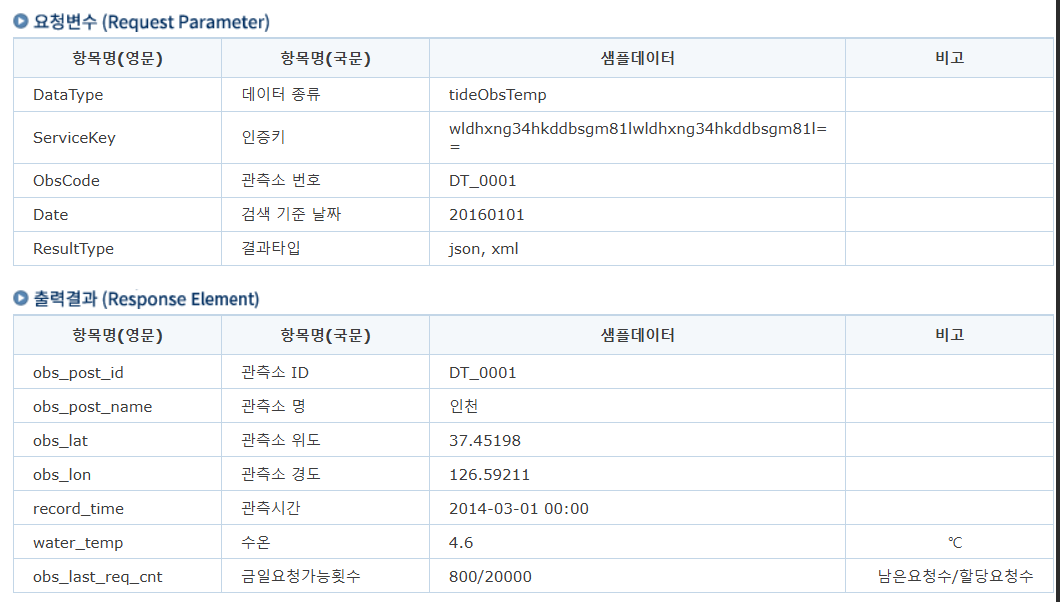

In [ ]:
data

{'result': {'data': [{'record_time': '2024-08-01 00:00:00',
    'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:01:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:02:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:03:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:04:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:05:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:06:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:07:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:08:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:09:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:10:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:11:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:12:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:13:00', 'water_temp': '21.3'},
   {'record_time': '2024-08-01 00:14:00', 'water_temp': '21.3'},
   


```
해석
result: JSON 객체의 최상위 키로, 데이터의 결과를 포함합니다.
data: 배열로, 여러 개의 측정 기록을 포함합니다.
각 배열 항목은 하나의 측정 기록을 나타냅니다:
record_time: 측정된 시간입니다. 형식은 "YYYY-MM-DD HH:MM:SS"입니다.
water_temp: 측정된 물의 온도입니다. 현재는 문자열 형식으로 "21.3"도씨(°C)입니다.
데이터 설명
주어진 데이터는 2024년 8월 1일의 측정 기록입니다.
측정 시점은 매 분 단위로 기록되어 있습니다(00:00부터 00:04까지).
모든 기록에서 물의 온도는 21.3°C로 일정합니다.```



## 또 명령하자
## 사진은 00시인데 유의미하지 않은것 같아서 13시로 바꿔서 해봄
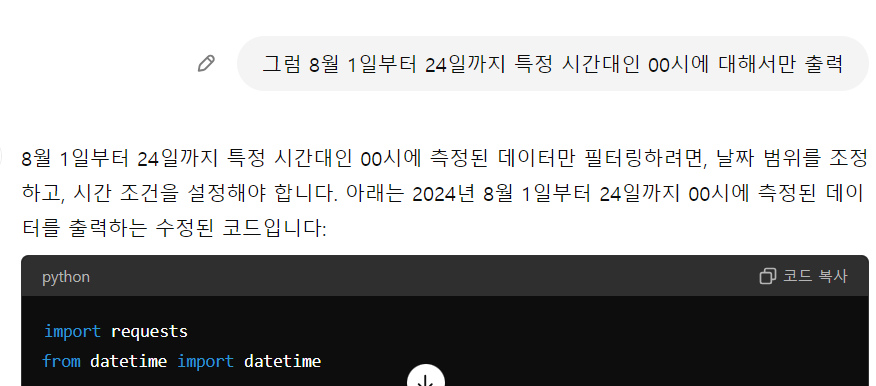

In [ ]:
import requests
from datetime import datetime, timedelta

def fetch_data_for_date(date):
    url = f'http://www.khoa.go.kr/api/oceangrid/tideObsTemp/search.do?ServiceKey=VkKixcDPfAWm7PV5tBnoSA==&ObsCode=DT_0005&Date={date}&ResultType=json'
    response = requests.get(url)
    return response.json()

# 날짜 범위 설정
start_date = datetime(2024, 8, 1)
end_date = datetime(2024, 8, 25)  # 8월 24일까지 포함
filter_time = '13:00:00'

filtered_records = []

current_date = start_date
while current_date < end_date:
    date_str = current_date.strftime('%Y%m%d')
    data = fetch_data_for_date(date_str)
    records = data.get('result', {}).get('data', [])

    for record in records:
        record_time = record.get('record_time', '')
        if record_time:
            try:
                # 문자열을 datetime 객체로 변환
                record_datetime = datetime.strptime(record_time, '%Y-%m-%d %H:%M:%S')

                # 날짜가 범위 안에 있고 시간이 00:00:00인 경우
                if record_datetime.strftime('%H:%M:%S') == filter_time:
                    filtered_records.append(record)
            except ValueError:
                # datetime 변환 실패 시 무시
                continue

    # 다음 날짜로 이동
    current_date += timedelta(days=1)

# 필터링된 데이터 출력
if filtered_records:
    for record in filtered_records:
        print(record)
else:
    print("해당 범위에 맞는 데이터가 없습니다.")


{'record_time': '2024-08-01 13:00:00', 'water_temp': '20.3'}
{'record_time': '2024-08-02 13:00:00', 'water_temp': '22'}
{'record_time': '2024-08-03 13:00:00', 'water_temp': '22.2'}
{'record_time': '2024-08-04 13:00:00', 'water_temp': '21.3'}
{'record_time': '2024-08-05 13:00:00', 'water_temp': '28'}
{'record_time': '2024-08-06 13:00:00', 'water_temp': '27.6'}
{'record_time': '2024-08-07 13:00:00', 'water_temp': '27.9'}
{'record_time': '2024-08-08 13:00:00', 'water_temp': '27.2'}
{'record_time': '2024-08-09 13:00:00', 'water_temp': '26.1'}
{'record_time': '2024-08-10 13:00:00', 'water_temp': '26.8'}
{'record_time': '2024-08-11 13:00:00', 'water_temp': '25.3'}
{'record_time': '2024-08-12 13:00:00', 'water_temp': '26.5'}
{'record_time': '2024-08-13 13:00:00', 'water_temp': '27'}
{'record_time': '2024-08-14 13:00:00', 'water_temp': '28.9'}
{'record_time': '2024-08-15 13:00:00', 'water_temp': '28.8'}
{'record_time': '2024-08-16 13:00:00', 'water_temp': '29.9'}
{'record_time': '2024-08-17 13

## 명령하기

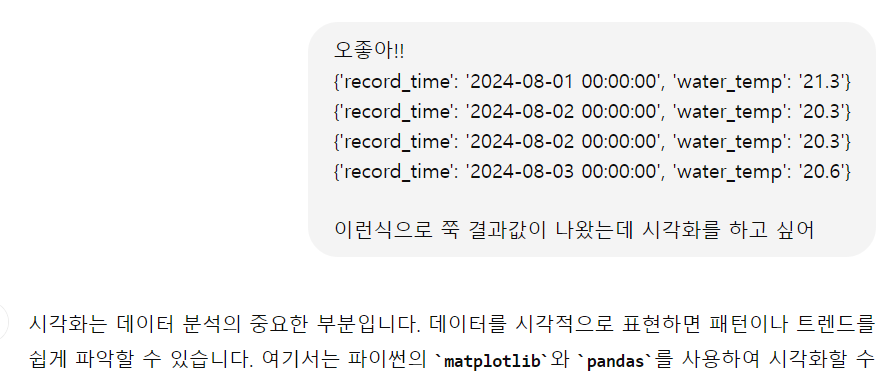

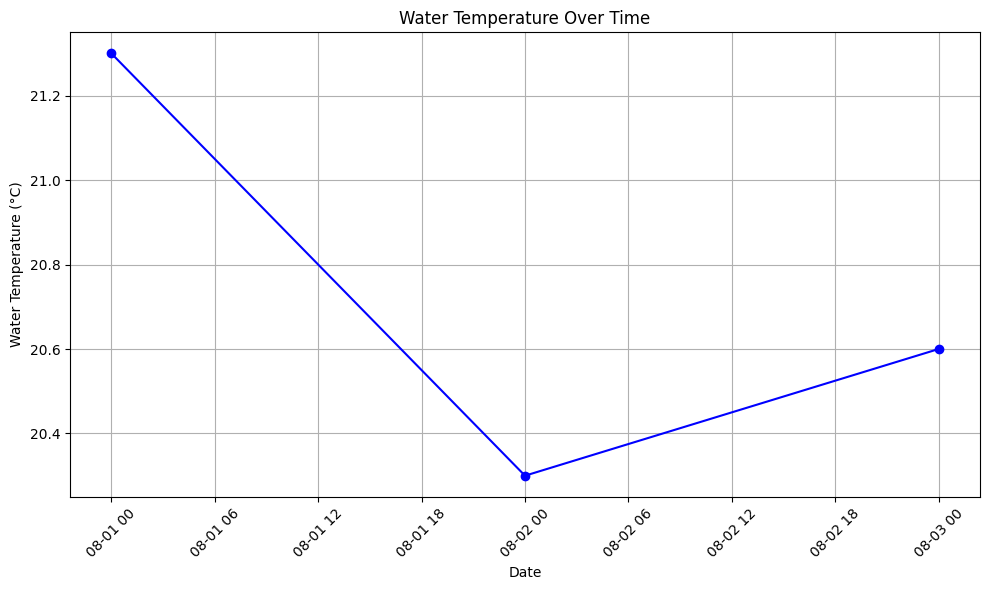

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 예시 (위에서 제공된 데이터로 대체)
data = [
    {'record_time': '2024-08-01 00:00:00', 'water_temp': '21.3'},
    {'record_time': '2024-08-02 00:00:00', 'water_temp': '20.3'},
    {'record_time': '2024-08-02 00:00:00', 'water_temp': '20.3'},
    {'record_time': '2024-08-03 00:00:00', 'water_temp': '20.6'}
]

# 데이터프레임 생성
df = pd.DataFrame(data)

# 'record_time' 컬럼을 datetime 형식으로 변환
df['record_time'] = pd.to_datetime(df['record_time'])

# 'water_temp' 컬럼을 숫자형으로 변환
df['water_temp'] = pd.to_numeric(df['water_temp'])

# 데이터 중복 제거 (같은 시간의 같은 온도는 한 번만 기록)
df = df.drop_duplicates()

# 시계열 데이터 설정
df.set_index('record_time', inplace=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['water_temp'], marker='o', linestyle='-', color='b')
plt.title('Water Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Water Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)  # X축 날짜 레이블 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


## 저급함
- x축을 확인해보자
- 명령을 조금 더 구체화시켜 진행해보자!

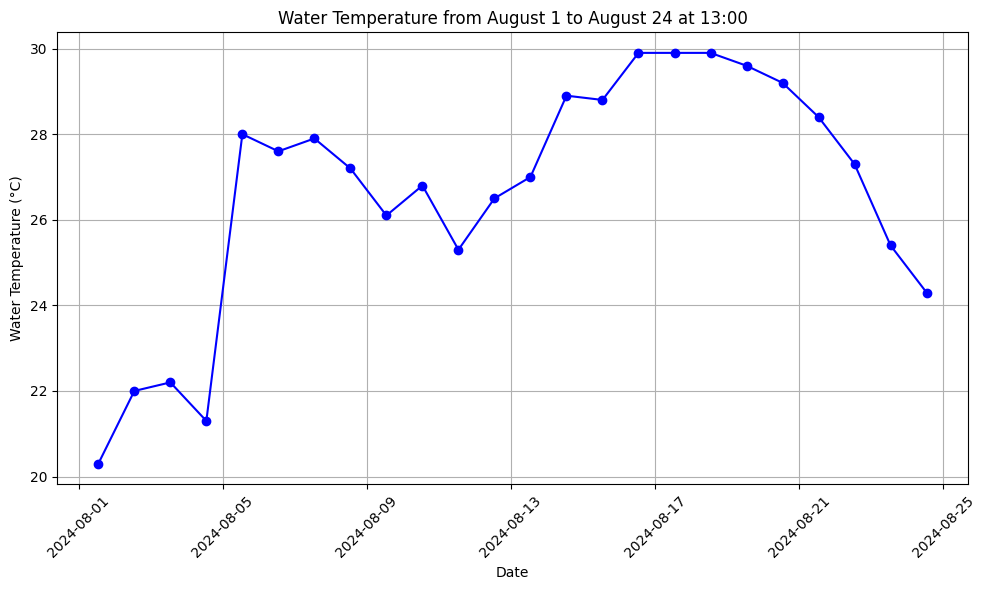

In [ ]:
import requests
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 요청 함수
def fetch_data_for_date(date):
    url = f'http://www.khoa.go.kr/api/oceangrid/tideObsTemp/search.do?ServiceKey=VkKixcDPfAWm7PV5tBnoSA==&ObsCode=DT_0005&Date={date}&ResultType=json'
    response = requests.get(url)
    return response.json()

# 날짜 범위 설정
start_date = datetime(2024, 8, 1)
end_date = datetime(2024, 8, 25)  # 8월 24일까지 포함
filter_time = '13:00:00'

filtered_records = []

current_date = start_date
while current_date < end_date:
    date_str = current_date.strftime('%Y%m%d')
    data = fetch_data_for_date(date_str)
    records = data.get('result', {}).get('data', [])

    for record in records:
        record_time = record.get('record_time', '')
        if record_time:
            try:
                # 문자열을 datetime 객체로 변환
                record_datetime = datetime.strptime(record_time, '%Y-%m-%d %H:%M:%S')

                # 날짜가 범위 안에 있고 시간이 13:00:00인 경우
                if record_datetime.strftime('%H:%M:%S') == filter_time:
                    filtered_records.append(record)
            except ValueError:
                # datetime 변환 실패 시 무시
                continue

    # 다음 날짜로 이동
    current_date += timedelta(days=1)

# 필터링된 데이터가 있는 경우
if filtered_records:
    # 데이터프레임 생성
    df = pd.DataFrame(filtered_records)

    # 'record_time' 컬럼을 datetime 형식으로 변환
    df['record_time'] = pd.to_datetime(df['record_time'])

    # 'water_temp' 컬럼을 숫자형으로 변환
    df['water_temp'] = pd.to_numeric(df['water_temp'])

    # 데이터 중복 제거 (같은 시간의 같은 온도는 한 번만 기록)
    df = df.drop_duplicates()

    # 시계열 데이터 설정
    df.set_index('record_time', inplace=True)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['water_temp'], marker='o', linestyle='-', color='b')
    plt.title('Water Temperature from August 1 to August 24 at 13:00')
    plt.xlabel('Date')
    plt.ylabel('Water Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)  # X축 날짜 레이블 회전
    plt.tight_layout()  # 레이아웃 자동 조정
    plt.show()
else:
    print("해당 범위에 맞는 데이터가 없습니다.")


## 생각해보자

- 8월 첫째주는 무슨 일이 있었을까?
- 기온과의 연관성은 없을까?

https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

https://news.ikbc.co.kr/article/view/kbc202408030010

In [ ]:
!pip install ipywidgets requests pandas matplotlib

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


DatePicker(value=datetime.datetime(2024, 8, 1, 0, 0), description='Start Date')

DatePicker(value=datetime.datetime(2024, 8, 24, 0, 0), description='End Date')

Text(value='13:00:00', description='Filter Time')

Button(description='Plot Data', style=ButtonStyle())

Fetching data from 2024-08-01 to 2024-08-15 for time 13:00:00


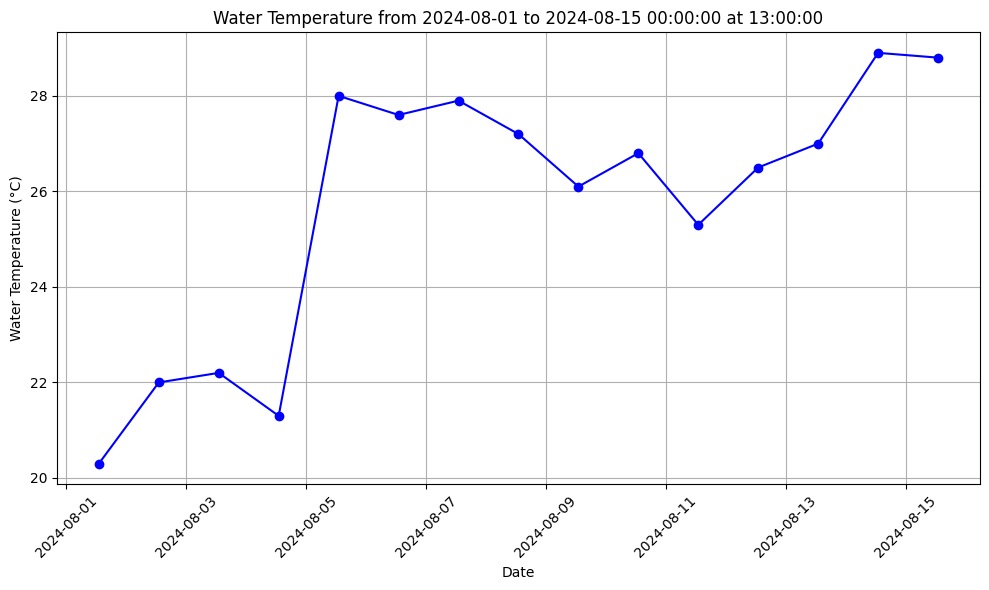

In [ ]:
import requests
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# 데이터 요청 함수
def fetch_data_for_date(date):
    try:
        url = f'http://www.khoa.go.kr/api/oceangrid/tideObsTemp/search.do?ServiceKey=VkKixcDPfAWm7PV5tBnoSA==&ObsCode=DT_0005&Date={date}&ResultType=json'
        response = requests.get(url)
        response.raise_for_status()  # HTTP 오류 발생 시 예외를 발생시킵니다
        return response.json()
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return {}

# 데이터 시각화 함수
def plot_data(start_date, end_date, filter_time):
    filtered_records = []

    current_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        data = fetch_data_for_date(date_str)

        if not data or 'result' not in data or 'data' not in data['result']:
            print(f"No data available for {date_str}")
            current_date += timedelta(days=1)
            continue

        records = data['result']['data']

        for record in records:
            record_time = record.get('record_time', '')
            if record_time:
                try:
                    # 문자열을 datetime 객체로 변환
                    record_datetime = datetime.strptime(record_time, '%Y-%m-%d %H:%M:%S')

                    # 날짜가 범위 안에 있고 시간이 filter_time인 경우
                    if record_datetime.strftime('%H:%M:%S') == filter_time:
                        filtered_records.append(record)
                except ValueError:
                    # datetime 변환 실패 시 무시
                    continue

        # 다음 날짜로 이동
        current_date += timedelta(days=1)

    # 필터링된 데이터가 있는 경우
    if filtered_records:
        # 데이터프레임 생성
        df = pd.DataFrame(filtered_records)

        # 'record_time' 컬럼을 datetime 형식으로 변환
        df['record_time'] = pd.to_datetime(df['record_time'])

        # 'water_temp' 컬럼을 숫자형으로 변환
        df['water_temp'] = pd.to_numeric(df['water_temp'], errors='coerce')  # 숫자로 변환, 변환 실패 시 NaN

        # NaN 값 제거
        df = df.dropna(subset=['water_temp'])

        # 데이터 중복 제거 (같은 시간의 같은 온도는 한 번만 기록)
        df = df.drop_duplicates()

        # 시계열 데이터 설정
        df.set_index('record_time', inplace=True)

        # 기존 그래프를 지우고 새 그래프를 그리기
        plt.figure(figsize=(10, 6))  # 새로운 그래프를 그릴 때마다 호출
        plt.plot(df.index, df['water_temp'], marker='o', linestyle='-', color='b')
        plt.title(f'Water Temperature from {start_date} to {end_date} at {filter_time}')
        plt.xlabel('Date')
        plt.ylabel('Water Temperature (°C)')
        plt.grid(True)
        plt.xticks(rotation=45)  # X축 날짜 레이블 회전
        plt.tight_layout()  # 레이아웃 자동 조정
        plt.show()
    else:
        print("해당 범위에 맞는 데이터가 없습니다.")

# 위젯 생성
start_date_widget = widgets.DatePicker(
    description='Start Date',
    value=datetime(2024, 8, 1)
)

end_date_widget = widgets.DatePicker(
    description='End Date',
    value=datetime(2024, 8, 24)
)

filter_time_widget = widgets.Text(
    description='Filter Time',
    value='13:00:00'
)

# 위젯을 통해 사용자 입력을 받아서 데이터를 시각화
def on_button_click(b):
    start_date = start_date_widget.value.strftime('%Y-%m-%d')
    end_date = end_date_widget.value.strftime('%Y-%m-%d')
    filter_time = filter_time_widget.value
    print(f"Fetching data from {start_date} to {end_date} for time {filter_time}")
    plot_data(start_date, end_date, filter_time)

button = widgets.Button(description="Plot Data")
button.on_click(on_button_click)

display(start_date_widget, end_date_widget, filter_time_widget, button)


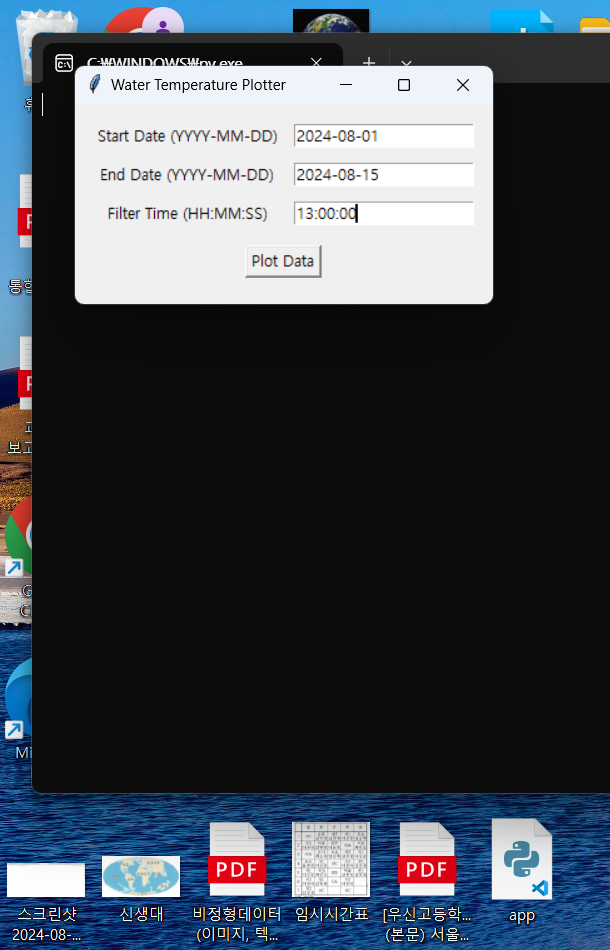

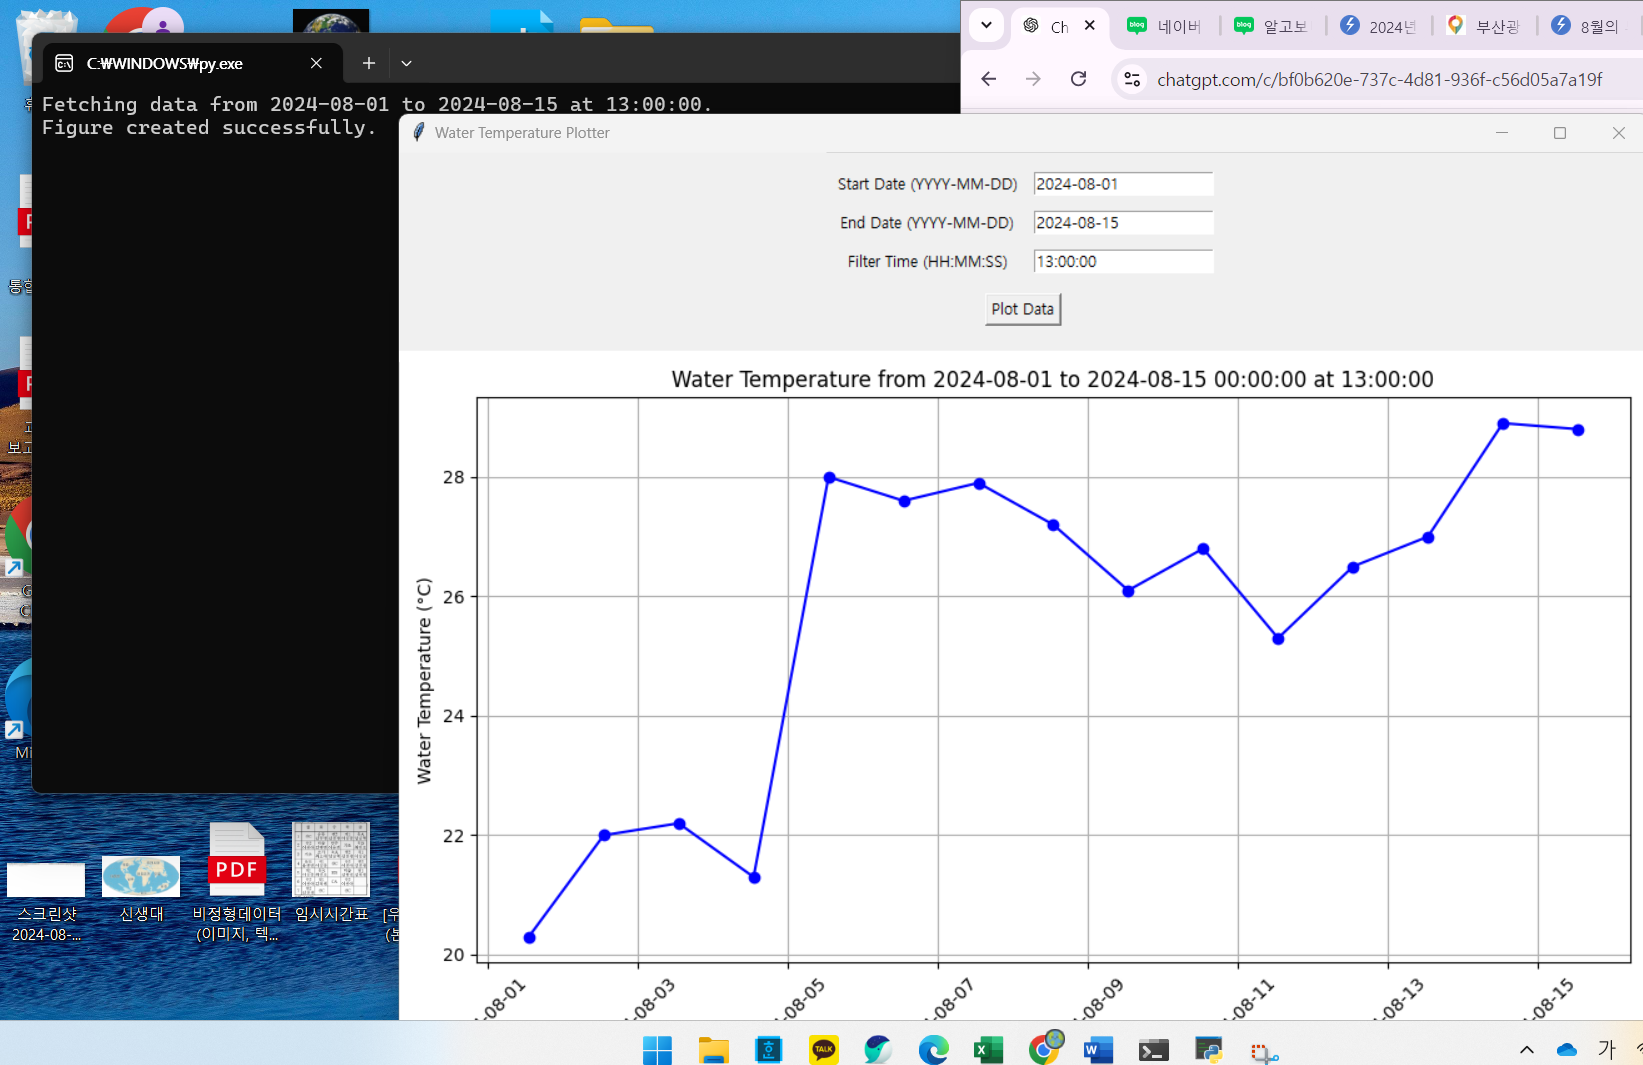

# 기타

오류 발생 시



```
### 오류

# 상태 코드 출력
print("Status Code:", response.status_code)

# 응답 내용 출력
print("Response Text:", response.text)

```



상태 코드가 200이 아닌 경우, 서버에서 요청을 처리하는 데 문제가 있다는 의미입니다. 상태 코드가 404라면 URL이 잘못되었거나 리소스가 존재하지 않는 것이고, 500이라면 서버 내부에서 오류가 발생한 것입니다.

응답 내용이 비어 있거나 JSON 형식이 아닌 경우, URL이나 API 요청에 문제가 있을 수 있습니다. 이 경우 API 문서를 확인하거나 파라미터를 다시 확인해보세요.







